In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # modele d'exemple a modifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [17]:
# Import data
data = pd.read_csv('data_train_diabetes_health_indicators.csv')
test = pd.read_csv('date_validation_diabetes_health_indicators.csv')
del data['Unnamed: 0']
del test['Unnamed: 0']
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
test['Diabetes_012'] = test['Diabetes_012'].astype(int)

X_train = data.drop(columns=['Diabetes_012'])
y_train = data['Diabetes_012']
X_test = test.drop(columns=['Diabetes_012'])
y_test = test['Diabetes_012']
# Split data into train and test
test.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2,1,1.0,1,32.0,1.0,0.0,1.0,1,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,0,0,1.0,1,28.0,0.0,0.0,0.0,0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,0,0,1.0,1,24.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,2,1,1.0,1,38.0,0.0,0.0,0.0,1,0,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,0,0,1.0,1,30.0,0.0,0.0,0.0,0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


# New Section

In [18]:
# Analyse data
#--- exemple ---
test.head(5)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2,1,1.0,1,32.0,1.0,0.0,1.0,1,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,0,0,1.0,1,28.0,0.0,0.0,0.0,0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,0,0,1.0,1,24.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,2,1,1.0,1,38.0,0.0,0.0,0.0,1,0,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,0,0,1.0,1,30.0,0.0,0.0,0.0,0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [19]:
data.shape

(47276, 22)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          47276 non-null  int64  
 1   HighBP                47276 non-null  int64  
 2   HighChol              47276 non-null  float64
 3   CholCheck             47276 non-null  int64  
 4   BMI                   47276 non-null  float64
 5   Smoker                47276 non-null  float64
 6   Stroke                47276 non-null  float64
 7   HeartDiseaseorAttack  47276 non-null  float64
 8   PhysActivity          47276 non-null  int64  
 9   Fruits                47276 non-null  int64  
 10  Veggies               47276 non-null  int64  
 11  HvyAlcoholConsump     47276 non-null  int64  
 12  AnyHealthcare         47276 non-null  int64  
 13  NoDocbcCost           47276 non-null  float64
 14  GenHlth               47276 non-null  float64
 15  MentHlth           

In [21]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [22]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
47271    False
47272    False
47273    False
47274    False
47275    False
Length: 47276, dtype: bool

In [23]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,0.619807,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,0.485439,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'Diabetes_012'),
  Text(0, 1.5, 'HighBP'),
  Text(0, 2.5, 'HighChol'),
  Text(0, 3.5, 'CholCheck'),
  Text(0, 4.5, 'BMI'),
  Text(0, 5.5, 'Smoker'),
  Text(0, 6.5, 'Stroke'),
  Text(0, 7.5, 'HeartDiseaseorAttack'),
  Text(0, 8.5, 'PhysActivity'),
  Text(0, 9.5, 'Fruits'),
  Text(0, 10.5, 'Veggies'),
  Text(0, 11.5, 'HvyAlcoholConsump'),
  Text(0, 12.5, 'AnyHealthcare'),
  Text(0, 13.5, 'NoDocbcCost'),
  Text(0, 14.5, 'GenHlth'),
  Text(0, 15.5, 'MentHlth'),
  Text(0, 16.5, 'PhysHlth'),
  Text(0, 17.5, 'DiffWalk'),
  Text(0, 18.5, 'Sex'),
  Text(0, 19.5, 'Age'),
  Text(0, 20.5, 'Education'),
  Text(0, 21.5, 'Income')])

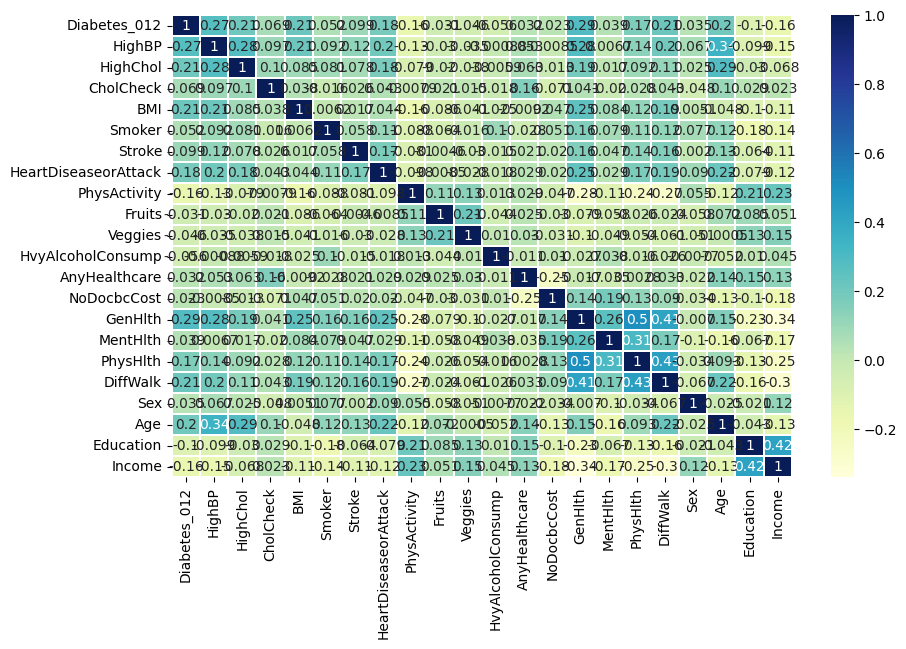

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

Text(0, 0.5, 'Count')

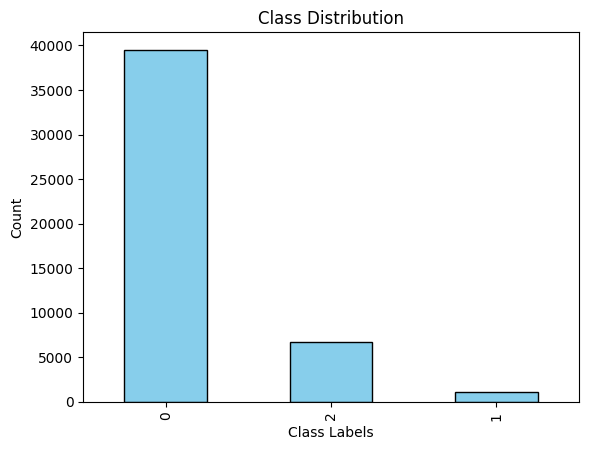

In [25]:
y_train.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

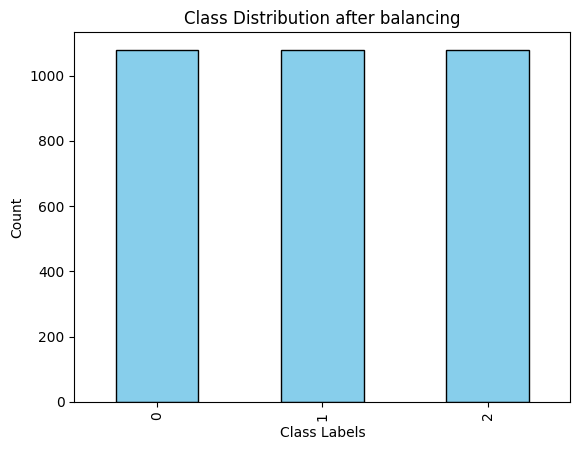

In [26]:
#balance the data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Adding labels and title
y_train_rus.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution after balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

In [27]:
# Initialize the model
#---- à modifier en utilisant l'un des trois modeles : SVM, RandomForest et GradientBoosting ----
svm = SVC()
# Train the model
svm.fit(X_train_rus, y_train_rus)

SVC()

In [28]:
# Predict on test data
pred =  svm.predict(X_test)
pred

array([1, 2, 1, ..., 2, 2, 0])

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      9855
           1       0.03      0.23      0.05       263
           2       0.31      0.64      0.42      1701

    accuracy                           0.60     11819
   macro avg       0.43      0.49      0.40     11819
weighted avg       0.83      0.60      0.68     11819


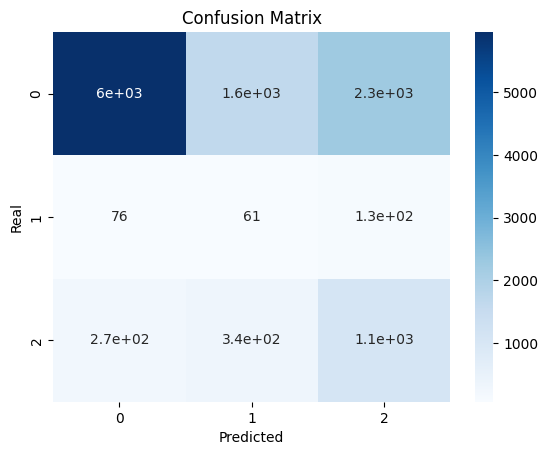

<Figure size 1200x1200 with 0 Axes>

In [29]:
# Evaluate model predictions
confusion_mat = confusion_matrix(test['Diabetes_012'], pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.figure(figsize=(12,12))
rep = classification_report(test['Diabetes_012'], pred)
print(rep)

In [ ]:
# Export model
pickle.dump(svm, open("svm_notebook.pkl", "wb"))